In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Set the root path as if it's being ran from the project root
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if project_root not in sys.path:
    sys.path.append(project_root)

In [4]:
import pygad
import numpy as np
import torch
import os
from ga.fitness import constrained_fitness_func
from ga.mutation import custom_mutation
from ga.model import load_model, evaluate_without_perturbation, evaluate_with_perturbation
from ga.utils import get_dataloader, visualize_images_batch,visualize_image, visualize_perturbation, compute_pixel_statistics, load_config

# Parameters

In [36]:
config = load_config()

In [32]:
# num_generations =num_generations=config["ga"]["num_generations"]
# num_parents_mating=config["ga"]["num_parents_mating"]
# sol_per_pop=config["ga"]["sol_per_pop"]
# init_range_low=config["ga"]["init_range_low"]
# init_range_high=config["ga"]["init_range_high"]
# mutation_percent_genes=config["ga"]["mutation_percent_genes"]

# model_type = config["model"]["model_type"]
# batch_size = config["model"]["batch_size"]

# visualize = config["visualization"]["visualize"]
# visualize_every = config["visualization"]["visualize_every"]


# Model

In [7]:
model = load_model(config["model"]["model_type"])

# Loading

In [8]:
# Load
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
image_dir = os.path.join(project_root, "nn/data/imagenet/val")
dataloader = get_dataloader(config["model"]["batch_size"], image_dir)


In [9]:
# Compute the pixel mean and standard deviation for each pixel across the entire dataset - for constrained fitness func
pixel_mean, pixel_std = compute_pixel_statistics(dataloader)

In [10]:
# First batch
input_batch, original_labels = next(iter(dataloader))

# Collect top perturbations from each generation
top_perturbations = []

# GA Config

In [11]:
def fitness_wrapper(ga_instance, solution, solution_idx):
    return constrained_fitness_func(
        ga_instance, solution, solution_idx, pixel_std, model, input_batch, original_labels, config["fitness"]["pixel_constraint_weight"], config["fitness"]["max_perturbation_magnitude"]
    )

In [28]:
def mutation_wrapper(offspring, ga_instance):
    return custom_mutation(offspring, ga_instance, pixel_std, config["fitness"]["pixel_constraint_weight"], config["fitness"]["max_perturbation_magnitude"], input_batch)

In [33]:
def on_generation(ga_instance):

    print(f"\nGeneration {ga_instance.generations_completed} completed with fitness: {ga_instance.last_generation_fitness}")

    input_batch, original_labels = next(iter(dataloader))
    print(f"New batch loaded with first label: {original_labels[0]}")
    
    # Print the best fitness for this generation
    best_solution, best_solution_fitness, _ = ga_instance.best_solution()
    print(f"Best Fitness = {best_solution_fitness}\n")

    best_perturbation = torch.tensor(best_solution).float().reshape(input_batch.shape[1:])
    top_perturbations.append(best_perturbation)
    print(f"Best perturbation magnitude: {torch.norm(best_perturbation).item()}")

    ########
    # VISUALIZATION
    ########
    if config["visualization"]["visualize"] and ga_instance.generations_completed % config["visualization"]["visualize_every"] == 0:
        print(f"Visualizing")
        # get the current best perturbation
        visualize_images_batch(input_batch, best_perturbation)

    # print(f"Generation {ga_instance.generations_completed}: Current Fitness: Best Fitness = {ga_instance.best_solution()[1]}")

Perturbation after clamping: 60.322994232177734
Perturbation magnitude after global clamping: 60.322994232177734
Perturbation after clamping: 60.47233581542969
Perturbation magnitude after global clamping: 60.47233581542969
Perturbation after clamping: 60.57112503051758
Perturbation magnitude after global clamping: 60.57112503051758
Perturbation after clamping: 60.52500915527344
Perturbation magnitude after global clamping: 60.52500915527344
Perturbation after clamping: 60.624725341796875
Perturbation magnitude after global clamping: 60.624725341796875
Perturbation after clamping: 60.790184020996094
Perturbation magnitude after global clamping: 60.790184020996094
Perturbation after clamping: 60.463558197021484
Perturbation magnitude after global clamping: 60.463558197021484
Perturbation after clamping: 60.60049057006836
Perturbation magnitude after global clamping: 60.60049057006836
Perturbation after clamping: 60.7396354675293
Perturbation magnitude after global clamping: 60.739635467

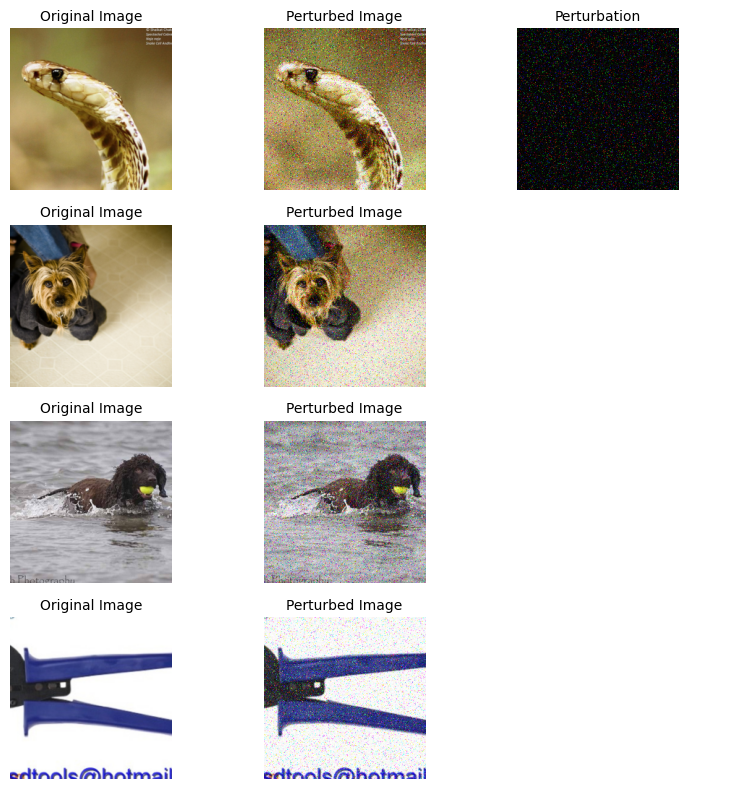

Perturbation after clamping: 80.6454086303711
Perturbation magnitude after global clamping: 80.6454086303711
Perturbation after clamping: 80.83793640136719
Perturbation magnitude after global clamping: 80.83793640136719
Perturbation after clamping: 80.72087097167969
Perturbation magnitude after global clamping: 80.72087097167969
Perturbation after clamping: 80.54412841796875
Perturbation magnitude after global clamping: 80.54412841796875
Perturbation after clamping: 80.50472259521484
Perturbation magnitude after global clamping: 80.50472259521484
Perturbation after clamping: 80.77445220947266
Perturbation magnitude after global clamping: 80.77445220947266
Perturbation after clamping: 80.89407348632812
Perturbation magnitude after global clamping: 80.89407348632812
Perturbation after clamping: 80.75563049316406
Perturbation magnitude after global clamping: 80.75563049316406
Perturbation after clamping: 80.80096435546875
Perturbation magnitude after global clamping: 80.80096435546875
Per

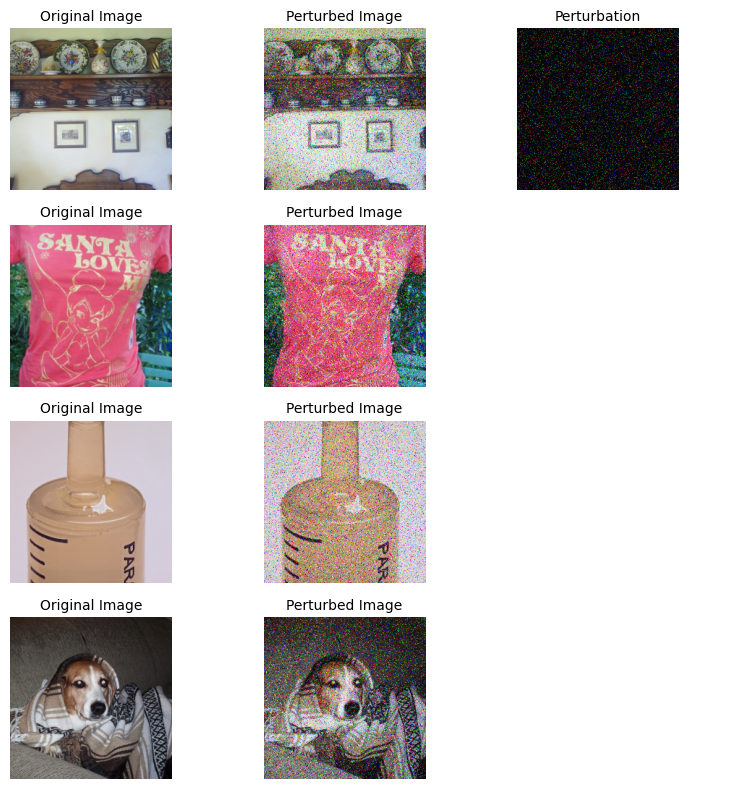

Perturbation after clamping: 95.28096008300781
Perturbation magnitude after global clamping: 84.9984130859375
Perturbation after clamping: 87.22770690917969
Perturbation magnitude after global clamping: 84.99933624267578
Perturbation after clamping: 89.62752532958984
Perturbation magnitude after global clamping: 84.99853515625
Perturbation after clamping: 95.64022827148438
Perturbation magnitude after global clamping: 84.9990463256836
Perturbation after clamping: 95.64134216308594
Perturbation magnitude after global clamping: 84.99939727783203
Perturbation after clamping: 95.37992858886719
Perturbation magnitude after global clamping: 84.99867248535156
Perturbation after clamping: 95.02548217773438
Perturbation magnitude after global clamping: 84.99900817871094
Perturbation after clamping: 95.56246185302734
Perturbation magnitude after global clamping: 84.9996566772461
Perturbation after clamping: 95.42774963378906
Perturbation magnitude after global clamping: 84.99848175048828
Perturb

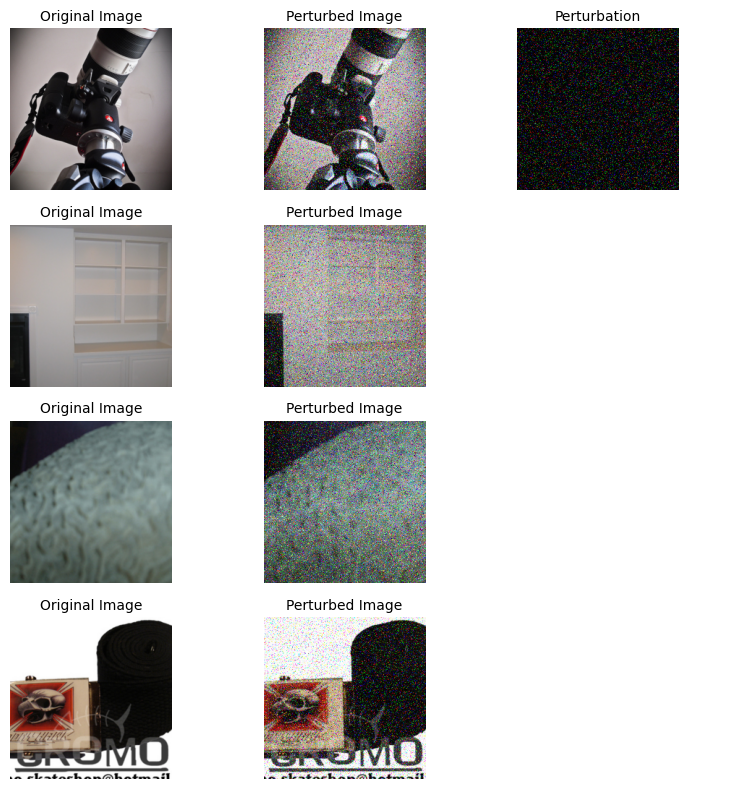

Perturbation after clamping: 97.37532806396484
Perturbation magnitude after global clamping: 85.00064086914062
Perturbation after clamping: 97.89100646972656
Perturbation magnitude after global clamping: 85.00025177001953
Perturbation after clamping: 100.43926239013672
Perturbation magnitude after global clamping: 84.99932861328125
Perturbation after clamping: 98.60459899902344
Perturbation magnitude after global clamping: 85.00007629394531
Perturbation after clamping: 99.04236602783203
Perturbation magnitude after global clamping: 84.99871826171875
Perturbation after clamping: 98.23155212402344
Perturbation magnitude after global clamping: 84.99977111816406
Perturbation after clamping: 98.62358093261719
Perturbation magnitude after global clamping: 84.99881744384766
Perturbation after clamping: 98.72853088378906
Perturbation magnitude after global clamping: 84.99908447265625
Perturbation after clamping: 98.51188659667969
Perturbation magnitude after global clamping: 84.99942779541016


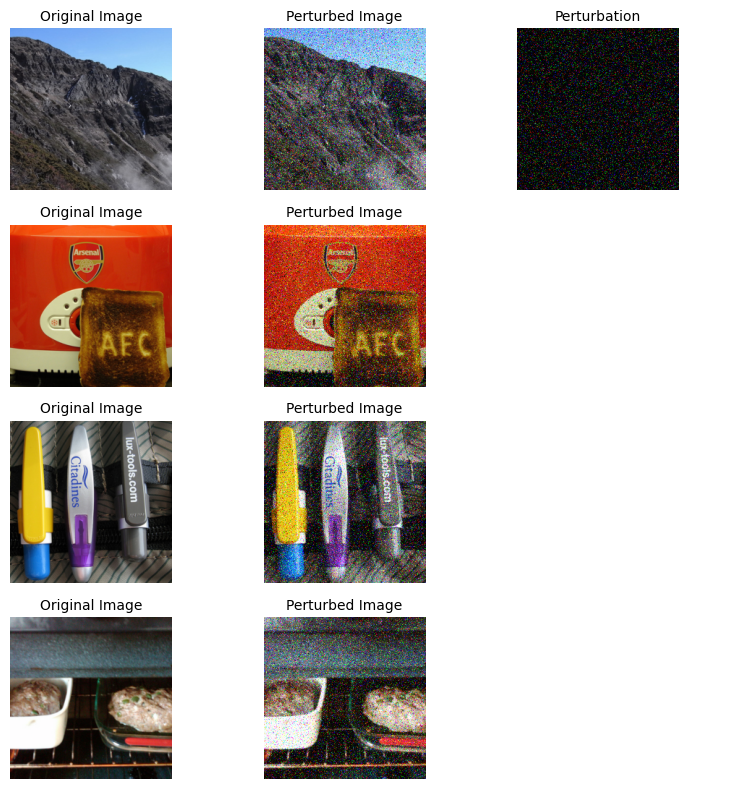

Perturbation after clamping: 97.8995590209961
Perturbation magnitude after global clamping: 85.0010757446289
Perturbation after clamping: 98.09288024902344
Perturbation magnitude after global clamping: 84.99858093261719
Perturbation after clamping: 97.3143081665039
Perturbation magnitude after global clamping: 84.9997329711914
Perturbation after clamping: 98.27936553955078
Perturbation magnitude after global clamping: 85.00035858154297
Perturbation after clamping: 98.38683319091797
Perturbation magnitude after global clamping: 84.99925231933594
Perturbation after clamping: 98.2131576538086
Perturbation magnitude after global clamping: 84.99917602539062
Perturbation after clamping: 97.77777862548828
Perturbation magnitude after global clamping: 84.99839782714844
Perturbation after clamping: 99.70645904541016
Perturbation magnitude after global clamping: 85.00041961669922
Perturbation after clamping: 98.61003112792969
Perturbation magnitude after global clamping: 85.00071716308594
Pertur

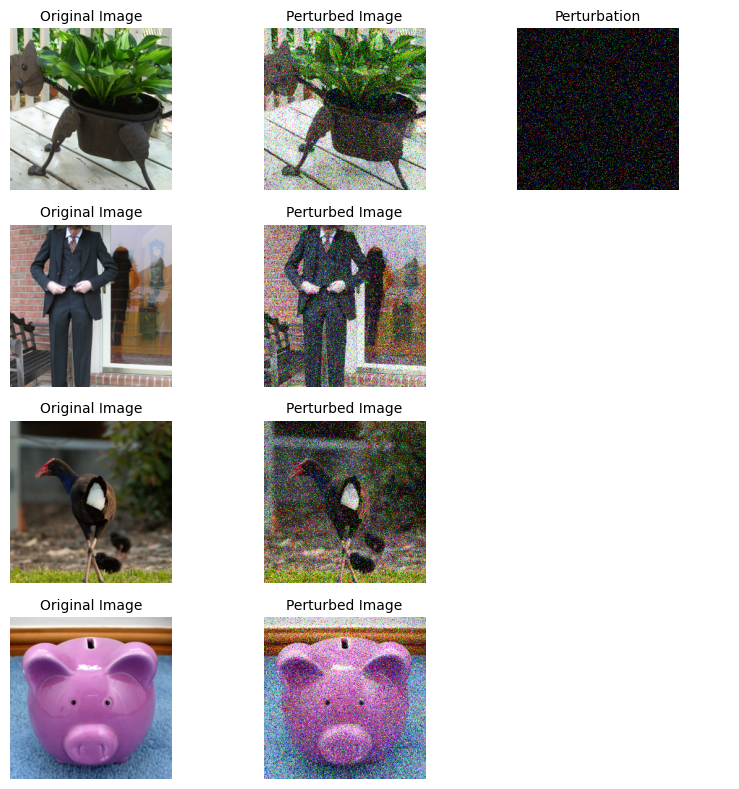

Perturbation after clamping: 98.55876922607422
Perturbation magnitude after global clamping: 84.99951934814453
Perturbation after clamping: 98.1701889038086
Perturbation magnitude after global clamping: 84.99915313720703
Perturbation after clamping: 98.629150390625
Perturbation magnitude after global clamping: 85.00016784667969
Perturbation after clamping: 98.338623046875
Perturbation magnitude after global clamping: 85.00005340576172
Perturbation after clamping: 98.8126449584961
Perturbation magnitude after global clamping: 84.9990005493164
Perturbation after clamping: 98.72834014892578
Perturbation magnitude after global clamping: 84.99987030029297
Perturbation after clamping: 98.17741394042969
Perturbation magnitude after global clamping: 85.00035095214844
Perturbation after clamping: 98.73735046386719
Perturbation magnitude after global clamping: 84.9993667602539
Perturbation after clamping: 98.6780776977539
Perturbation magnitude after global clamping: 84.99964904785156
Perturbati

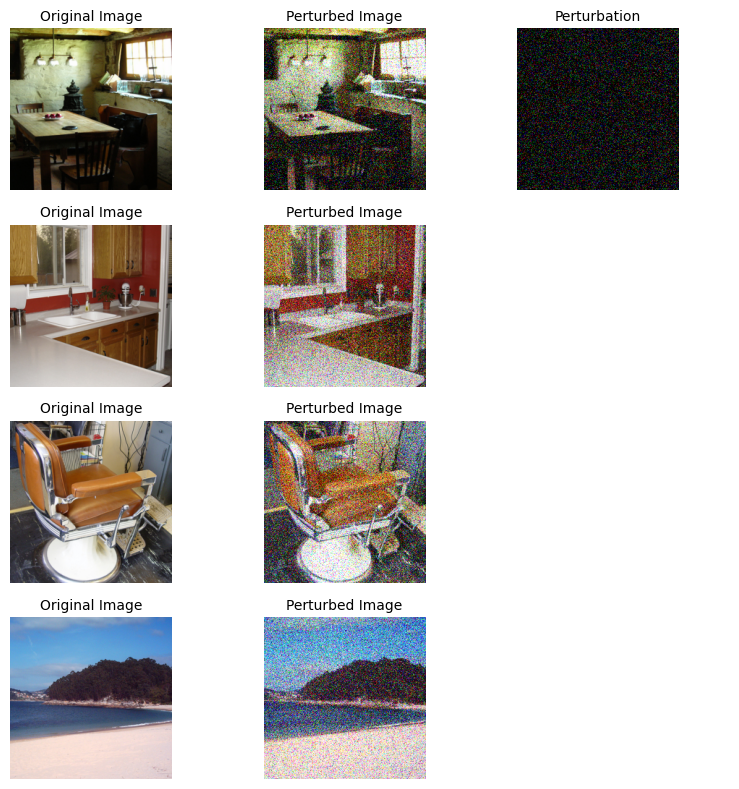

Perturbation after clamping: 98.69049072265625
Perturbation magnitude after global clamping: 84.99893951416016
Perturbation after clamping: 98.68812561035156
Perturbation magnitude after global clamping: 85.00001525878906
Perturbation after clamping: 98.62334442138672
Perturbation magnitude after global clamping: 84.9995346069336
Perturbation after clamping: 98.69499969482422
Perturbation magnitude after global clamping: 84.99897766113281
Perturbation after clamping: 98.54885864257812
Perturbation magnitude after global clamping: 84.99958038330078
Perturbation after clamping: 98.55538940429688
Perturbation magnitude after global clamping: 84.99938201904297
Perturbation after clamping: 98.63359832763672
Perturbation magnitude after global clamping: 85.00006103515625
Perturbation after clamping: 98.77433776855469
Perturbation magnitude after global clamping: 85.00018310546875
Perturbation after clamping: 99.08840942382812
Perturbation magnitude after global clamping: 84.99900817871094
Pe

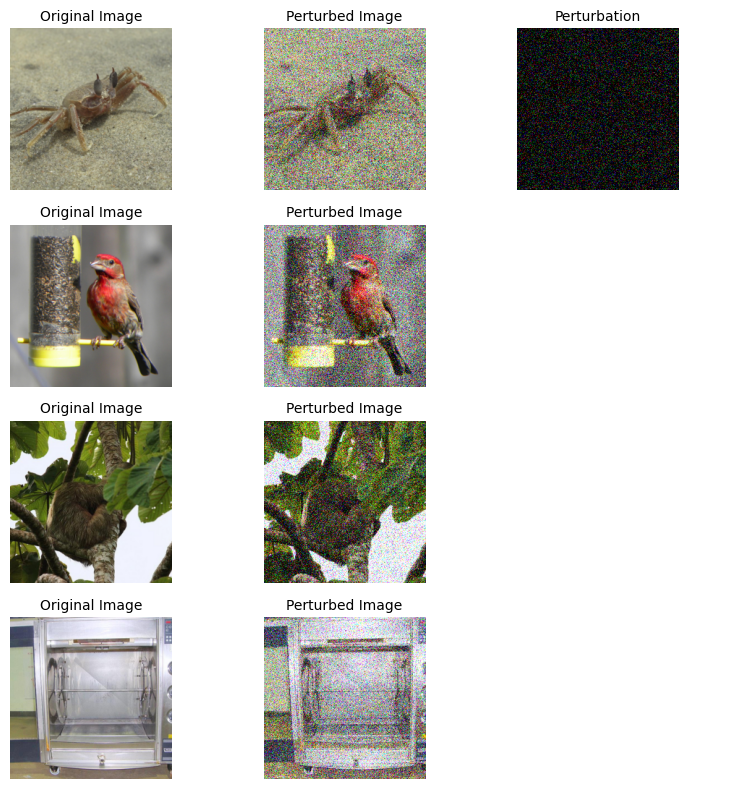

Perturbation after clamping: 98.69425964355469
Perturbation magnitude after global clamping: 85.00053405761719
Perturbation after clamping: 98.70643615722656
Perturbation magnitude after global clamping: 84.99899291992188
Perturbation after clamping: 98.72864532470703
Perturbation magnitude after global clamping: 84.99906921386719
Perturbation after clamping: 98.45213317871094
Perturbation magnitude after global clamping: 84.99946594238281
Perturbation after clamping: 98.35687255859375
Perturbation magnitude after global clamping: 84.99951171875
Perturbation after clamping: 98.54532623291016
Perturbation magnitude after global clamping: 84.99890899658203
Perturbation after clamping: 98.68101501464844
Perturbation magnitude after global clamping: 84.99971771240234
Perturbation after clamping: 98.47746276855469
Perturbation magnitude after global clamping: 85.00025939941406
Perturbation after clamping: 98.7686767578125
Perturbation magnitude after global clamping: 84.99942779541016
Pertu

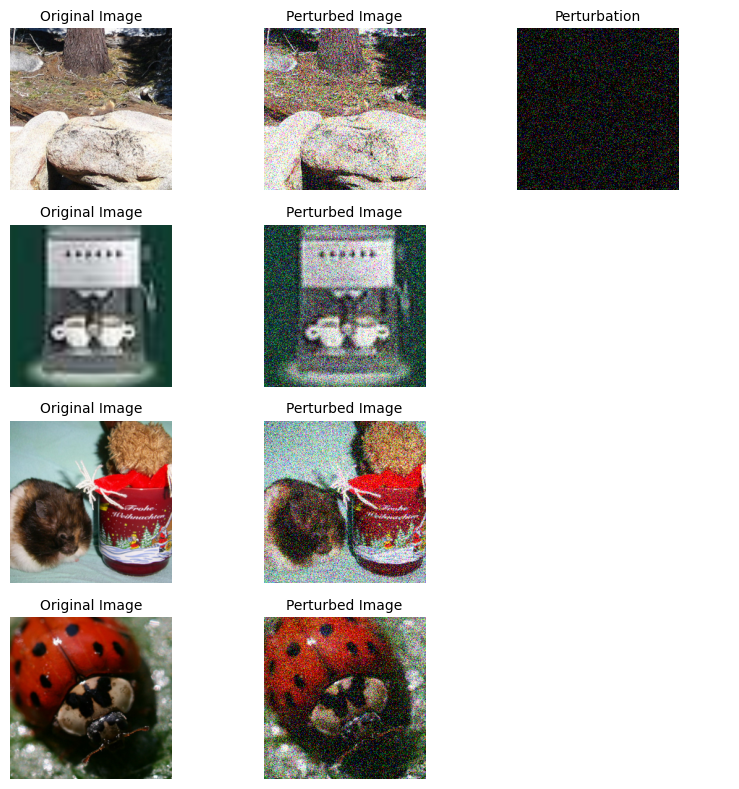

In [37]:
config = load_config()

ga_instance = pygad.GA(
    num_generations=config["ga"]["num_generations"],
    num_parents_mating=config["ga"]["num_parents_mating"],
    sol_per_pop=config["ga"]["sol_per_pop"],
    num_genes=3*224*224,
    gene_type=float,
    init_range_low=config["ga"]["init_range_low"],
    init_range_high=config["ga"]["init_range_high"],
    mutation_percent_genes=config["ga"]["mutation_percent_genes"],
    mutation_type=mutation_wrapper,
    fitness_func=fitness_wrapper,
    on_generation=on_generation,
)

ga_instance.run()

##### Best fitness records
- no pixel constraints: 0.84
- pixel constraint weight 1: 0.80
- above + max perturbation mag 100: 

In [29]:
input_batch.shape

torch.Size([64, 3, 224, 224])

In [22]:
# After the run
solution, solution_fitness, _ = ga_instance.best_solution()
print(f"Best solution fitness: {solution_fitness}") # Might be the penultimate best fitness??

Best solution fitness: 0.84375


# Calculating Universal Perturbation

In [25]:
if len(top_perturbations) > 0:
    universal_perturbation = torch.mean(torch.stack(top_perturbations), dim=0)
    print(universal_perturbation.shape)
    print(f"Universal perturbation created.")
    visualize_perturbation(universal_perturbation)

AttributeError: 'list' object has no attribute 'shape'

# Metrics

In [ ]:
evaluate_without_perturbation(model, dataloader, universal_perturbation)

In [ ]:
evaluate_with_perturbation(model, dataloader, universal_perturbation)